In [37]:
'''
파일명 : Ex01.ipynb
설명 : 노드 9-1 당뇨병 데이터셋을 활용한 다중 선형 회귀, 노드 9-2 자전거 수요 예측
작성자 : 김영민
최초작성일 : 2024-11-04
최종수정일 : 2024-11-04
github : https://github.com/ggumtakg/AIFFEL_quest_rs/tree/main/Exploration/Ex01
'''
#노드 9-1
from IPython.display import display, Image
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

In [38]:
diabetes = load_diabetes()#데이터셋 불러오기

df_X = diabetes.data#입력데이터
df_Y = diabetes.target#타겟데이터

print(df_X.shape)
print(df_Y.shape)

(442, 10)
(442,)


In [39]:
df_X_train, df_X_test, df_Y_train, df_Y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=20)#8:2비율로 train_test_split

print(df_X_train.shape, df_Y_train.shape)
print(df_X_test.shape, df_Y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [40]:
for i, feature_name in enumerate(diabetes.feature_names):
    print(f'feature {i+1} : {feature_name}')#데이터셋 구조파악

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [41]:
print(df_X[0])
print()
print(df_Y[0])

[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]

151.0


In [42]:
def model(x, w, b):#모델함수 구현
    predictions = 0
    for i in range(10):
        predictions += x[:, i] * w[i]
    predictions += b
    return predictions

In [43]:
def MSE(a, b):#MSE
    mse = ((a - b) ** 2).mean()
    return mse

def loss(x, w, b, y):#loss
    predictions = model(x, w, b)
    L = MSE(predictions, y)
    return L

In [44]:
def gradient(x, w, b, y):#gradient
    #데이터 포인트의 개수
    N = len(y)
    
    y_pred = model(x, w, b)
    
    # w gradient 계산
    dw = 1 / N * 2 * x.T.dot(y_pred - y)
        
    # b gradient 계산
    db = 2 * (y_pred - y).mean()
    return dw, db

In [45]:
LEARNING_RATE = 0.001#학습률

w_rand = np.random.rand(10)
b_rand = np.random.rand()

w = w_rand
b = b_rand

In [46]:
losses = []

for i in range(1, 1001):
    dw, db = gradient(df_X_train, w, b, df_Y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(df_X_train, w, b, df_Y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 28657.4239
Iteration 20 : Loss 27762.5634
Iteration 30 : Loss 26902.7956
Iteration 40 : Loss 26076.7430
Iteration 50 : Loss 25283.0823
Iteration 60 : Loss 24520.5423
Iteration 70 : Loss 23787.9014
Iteration 80 : Loss 23083.9861
Iteration 90 : Loss 22407.6690
Iteration 100 : Loss 21757.8668
Iteration 110 : Loss 21133.5390
Iteration 120 : Loss 20533.6855
Iteration 130 : Loss 19957.3460
Iteration 140 : Loss 19403.5974
Iteration 150 : Loss 18871.5530
Iteration 160 : Loss 18360.3611
Iteration 170 : Loss 17869.2032
Iteration 180 : Loss 17397.2929
Iteration 190 : Loss 16943.8748
Iteration 200 : Loss 16508.2232
Iteration 210 : Loss 16089.6406
Iteration 220 : Loss 15687.4572
Iteration 230 : Loss 15301.0294
Iteration 240 : Loss 14929.7386
Iteration 250 : Loss 14572.9909
Iteration 260 : Loss 14230.2154
Iteration 270 : Loss 13900.8637
Iteration 280 : Loss 13584.4090
Iteration 290 : Loss 13280.3451
Iteration 300 : Loss 12988.1856
Iteration 310 : Loss 12707.4633
Iteration 320 : L

In [47]:
w, b

(array([ 2.07817546,  0.33554044,  5.35587101,  4.13410316,  1.67656808,
         2.13088386, -2.66721958,  3.34315791,  4.36115261,  3.32435413]),
 133.91065314869928)

In [48]:
prediction_001_1000 = model(df_X_test, w, b)
mse = loss(df_X_test, w, b, df_Y_test)
print(mse)

5925.091101908716


In [49]:
#학습률, 반복수 다르게 해서 비교
LEARNING_RATE = 0.001#학습률

w = w_rand
b = b_rand

for i in range(1, 501):
    dw, db = gradient(df_X_train, w, b, df_Y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(df_X_train, w, b, df_Y_train)
    losses.append(L)
    '''if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))'''
        
prediction_001_500 = model(df_X_test, w, b)
mse = loss(df_X_test, w, b, df_Y_test)
print(mse)

#학습률, 반복수 다르게 해서 비교
LEARNING_RATE = 0.005#학습률

w = w_rand
b = b_rand

for i in range(1, 1001):
    dw, db = gradient(df_X_train, w, b, df_Y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(df_X_train, w, b, df_Y_train)
    losses.append(L)
    '''if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))'''
        
prediction_005_1000 = model(df_X_test, w, b)
mse = loss(df_X_test, w, b, df_Y_test)
print(mse)

#학습률, 반복수 다르게 해서 비교
LEARNING_RATE = 0.005#학습률

w = w_rand
b = b_rand

for i in range(1, 501):
    dw, db = gradient(df_X_train, w, b, df_Y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(df_X_train, w, b, df_Y_train)
    losses.append(L)
    '''if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))'''
        
prediction_005_500 = model(df_X_test, w, b)
mse = loss(df_X_test, w, b, df_Y_test)
print(mse)

#학습률, 반복수 다르게 해서 비교
LEARNING_RATE = 0.005#학습률

w = w_rand
b = b_rand

for i in range(1, 201):
    dw, db = gradient(df_X_train, w, b, df_Y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(df_X_train, w, b, df_Y_train)
    losses.append(L)
    '''if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))'''
        
prediction_005_200 = model(df_X_test, w, b)
mse = loss(df_X_test, w, b, df_Y_test)
print(mse)

#학습률, 반복수 다르게 해서 비교
LEARNING_RATE = 0.005#학습률

w = w_rand
b = b_rand

for i in range(1, 101):
    dw, db = gradient(df_X_train, w, b, df_Y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(df_X_train, w, b, df_Y_train)
    losses.append(L)
    '''if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))'''
        
prediction_005_100 = model(df_X_test, w, b)
mse = loss(df_X_test, w, b, df_Y_test)
print(mse)

7748.635241365341
5633.954765088994
5455.295457432534
5354.963808412893
7229.435462793453


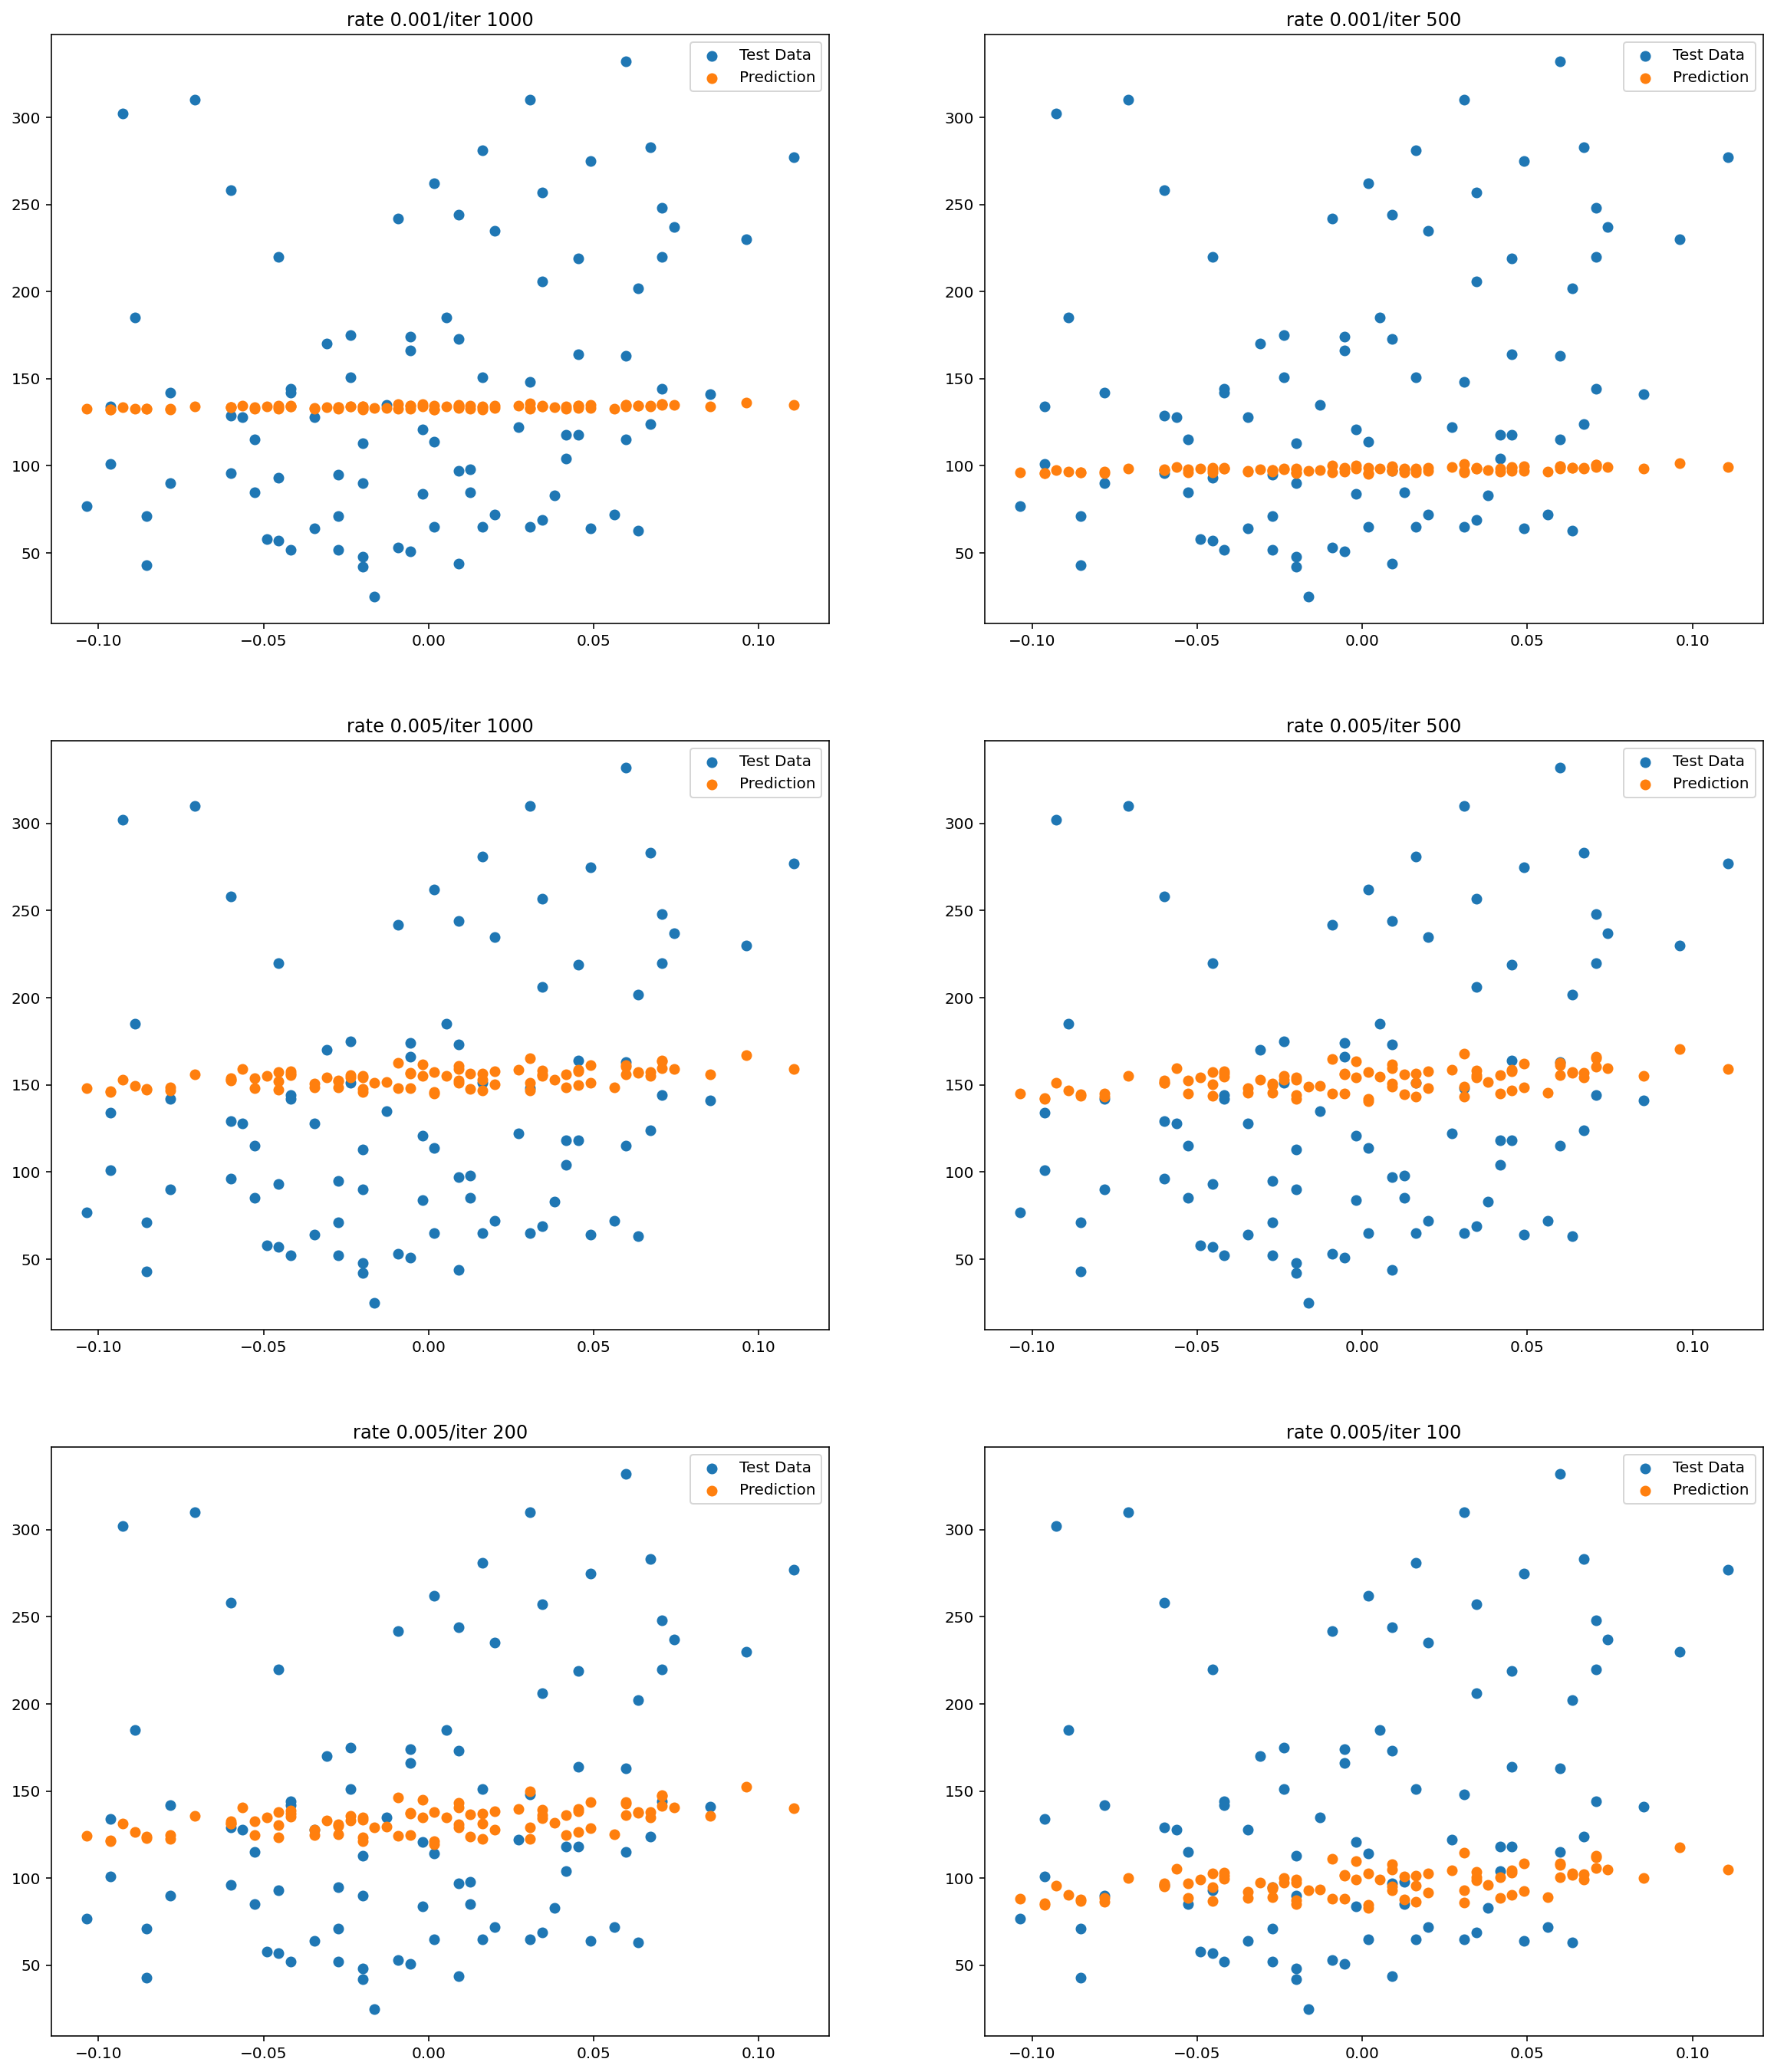

In [50]:
fig, axs = plt.subplots(3, 2, figsize=(20, 24))

axs[0, 0].scatter(df_X_test[:, 0], df_Y_test, label='Test Data')
axs[0, 0].scatter(df_X_test[:, 0], prediction_001_1000, label='Prediction')
axs[0, 0].legend()
axs[0, 0].set_title("rate 0.001/iter 1000")  # 학습률 0.001 반복수 1000회

axs[0, 1].scatter(df_X_test[:, 0], df_Y_test, label='Test Data')
axs[0, 1].scatter(df_X_test[:, 0], prediction_001_500, label='Prediction')
axs[0, 1].legend()
axs[0, 1].set_title("rate 0.001/iter 500")  # 학습률 0.001 반복수 500회

axs[1, 0].scatter(df_X_test[:, 0], df_Y_test, label='Test Data')
axs[1, 0].scatter(df_X_test[:, 0], prediction_005_1000, label='Prediction')
axs[1, 0].legend()
axs[1, 0].set_title("rate 0.005/iter 1000")  # 학습률 0.005 반복수 1000회

axs[1, 1].scatter(df_X_test[:, 0], df_Y_test, label='Test Data')
axs[1, 1].scatter(df_X_test[:, 0], prediction_005_500, label='Prediction')
axs[1, 1].legend()
axs[1, 1].set_title("rate 0.005/iter 500")  # 학습률 0.005 반복수 500회

axs[2, 0].scatter(df_X_test[:, 0], df_Y_test, label='Test Data')
axs[2, 0].scatter(df_X_test[:, 0], prediction_005_200, label='Prediction')
axs[2, 0].legend()
axs[2, 0].set_title("rate 0.005/iter 200")  # 학습률 0.005 반복수 200회

axs[2, 1].scatter(df_X_test[:, 0], df_Y_test, label='Test Data')
axs[2, 1].scatter(df_X_test[:, 0], prediction_005_100, label='Prediction')
axs[2, 1].legend()
axs[2, 1].set_title("rate 0.005/iter 100")  # 학습률 0.005 반복수 100회

plt.show()

#배열과 반복문을 활용하면 더욱 다양한 학습률과 반복수에서 결과를 쉽게 도출할 수 있습니다.

In [57]:
#노드 9-2
import pandas as pd

path = '~/data/data/bike-sharing-demand/train.csv'
train = pd.read_csv(path)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [58]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

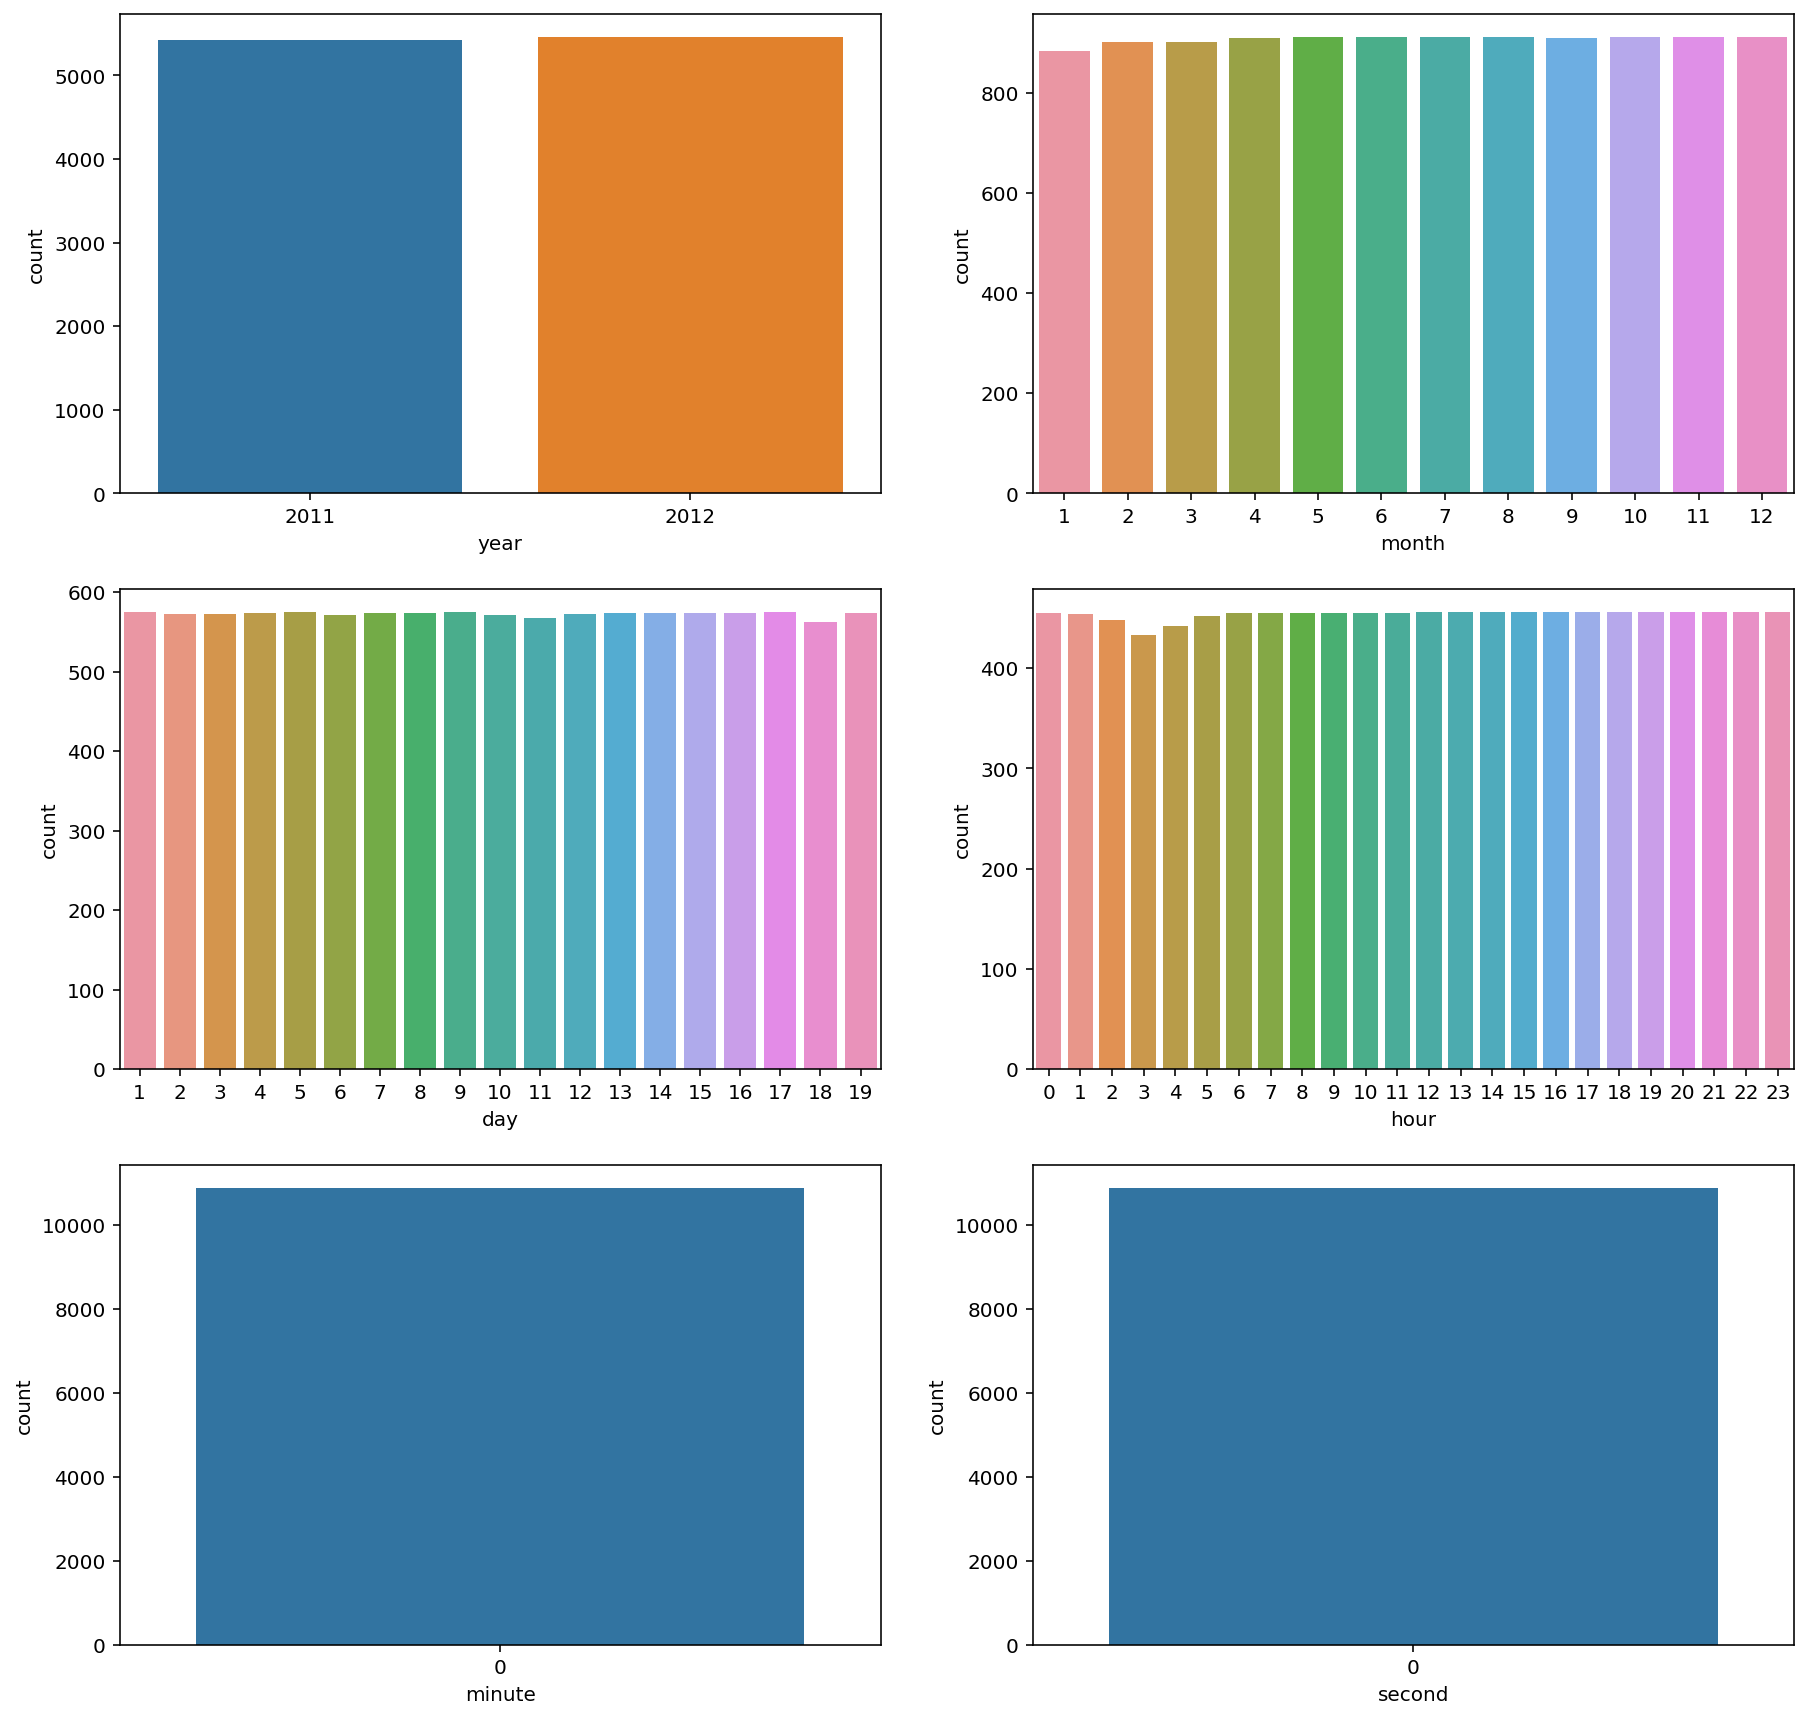

In [59]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
sns.countplot(x='year', data=train, ax=axs[0, 0])
sns.countplot(x='month', data=train, ax=axs[0, 1])
sns.countplot(x='day', data=train, ax=axs[1, 0])
sns.countplot(x='hour', data=train, ax=axs[1, 1])
sns.countplot(x='minute', data=train, ax=axs[2, 0])
sns.countplot(x='second', data=train, ax=axs[2, 1])
plt.show()

In [60]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [61]:
train = pd.get_dummies(train, columns=['season', 'weather'])
train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,minute,second,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,0,0,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,0,0,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,0,0,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,0,0,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,0,0,1,0,0,0,1,0,0,0


In [63]:
from sklearn.model_selection import train_test_split

X = train[['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4']]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 19784.295155117892, RMSE: 140.6566569882773


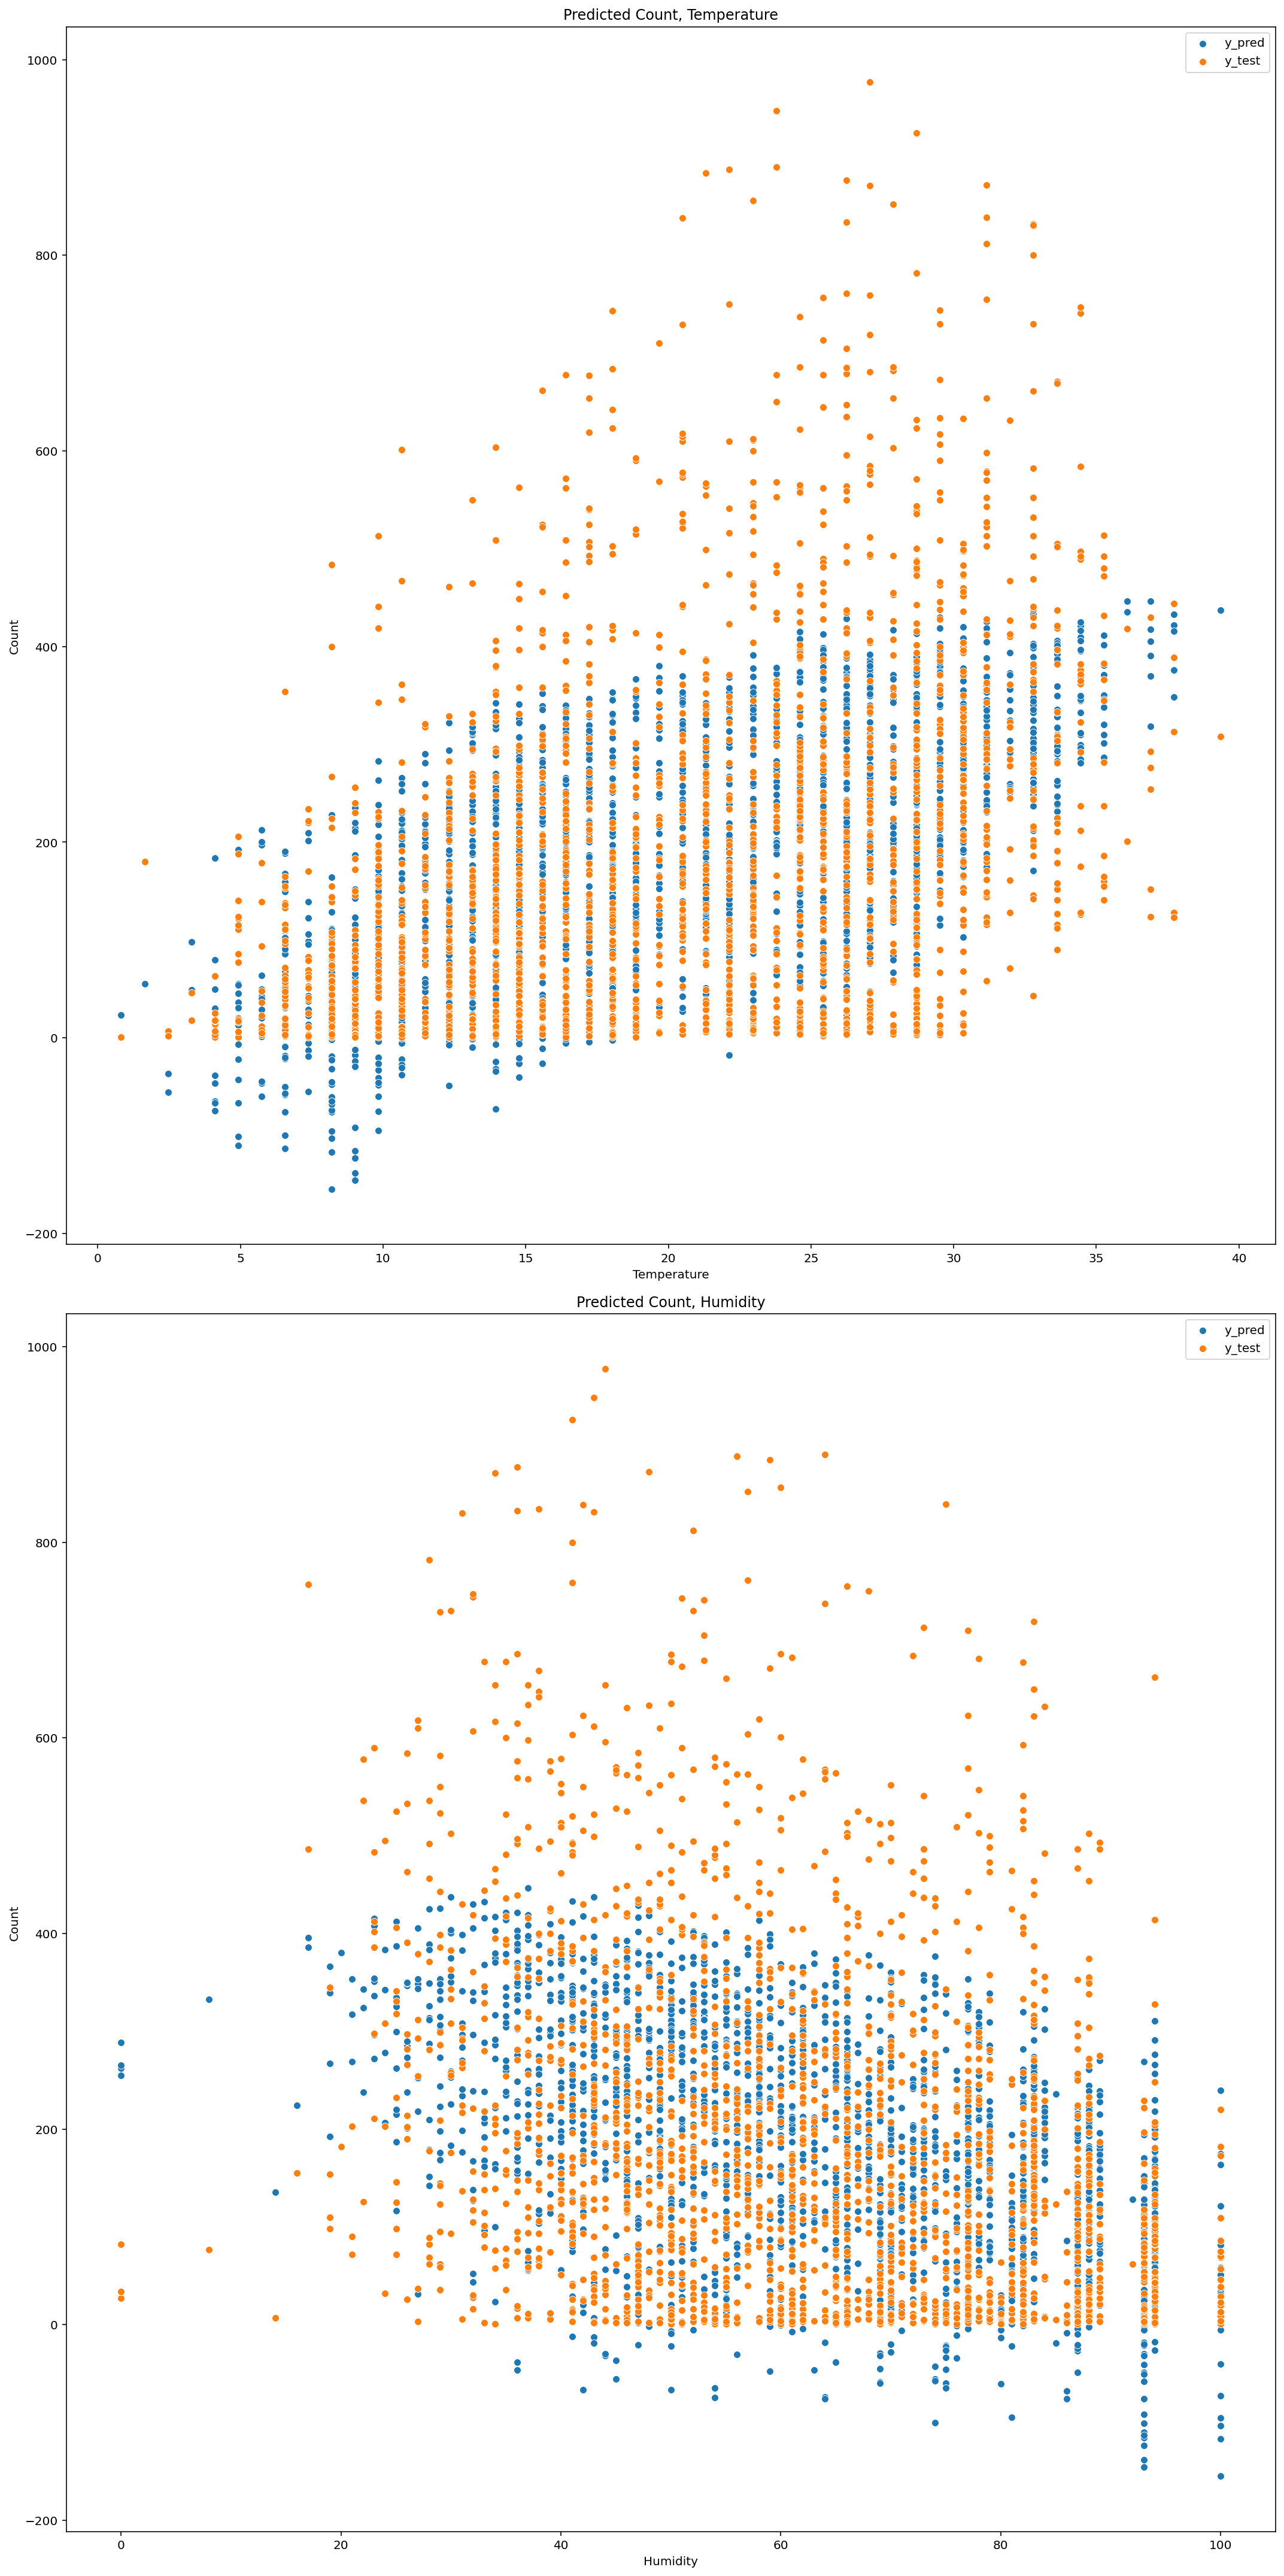

In [71]:
plt.figure(figsize=(15, 30))
plt.subplot(2, 1, 1)
sns.scatterplot(x=X_test['temp'], y=y_pred, label='y_pred')
sns.scatterplot(x=X_test['temp'], y=y_test, label='y_test')
plt.title('Predicted Count, Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend()

plt.subplot(2, 1, 2)
sns.scatterplot(x=X_test['humidity'], y=y_pred, label='y_pred')
sns.scatterplot(x=X_test['humidity'], y=y_test, label='y_test')
plt.title('Predicted Count, Humidity')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()